In [13]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import pyheif
from skimage import feature, color

In [4]:
image_directory = 'Apples_data'
new_size = (128, 128) ################ SHIFT TO DATA PREPROCESSING ##################resized images to width 128 pixels and height 128 pixels

# Lists to hold image data and labels
images = []
labels = []
intensities = []


def open_image(image_path):
    try:
        # Check for HEIC file format
        if image_path.lower().endswith('.heic'):
            heif_file = pyheif.read(image_path)
            return Image.frombytes(
                heif_file.mode,
                heif_file.size,
                heif_file.data,
                "raw",
                heif_file.mode,
                heif_file.stride,
            )
        else:
            return Image.open(image_path)
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None


for label_folder in os.listdir(image_directory):
    label_folder_path = os.path.join(image_directory, label_folder)
    if os.path.isdir(label_folder_path):
        for image_file in os.listdir(label_folder_path):
            image_path = os.path.join(label_folder_path, image_file)
            try:
                with open_image(image_path) as img:
                    img = img.resize(new_size)
                    img_array = np.array(img)
                    images.append(img_array)
                    labels.append(label_folder)
                    mean_intensity = img_array.mean(axis=2).flatten()
                    intensities.extend(mean_intensity)
            except Exception as e:
                print(f"Error processing {image_file}: {e}")


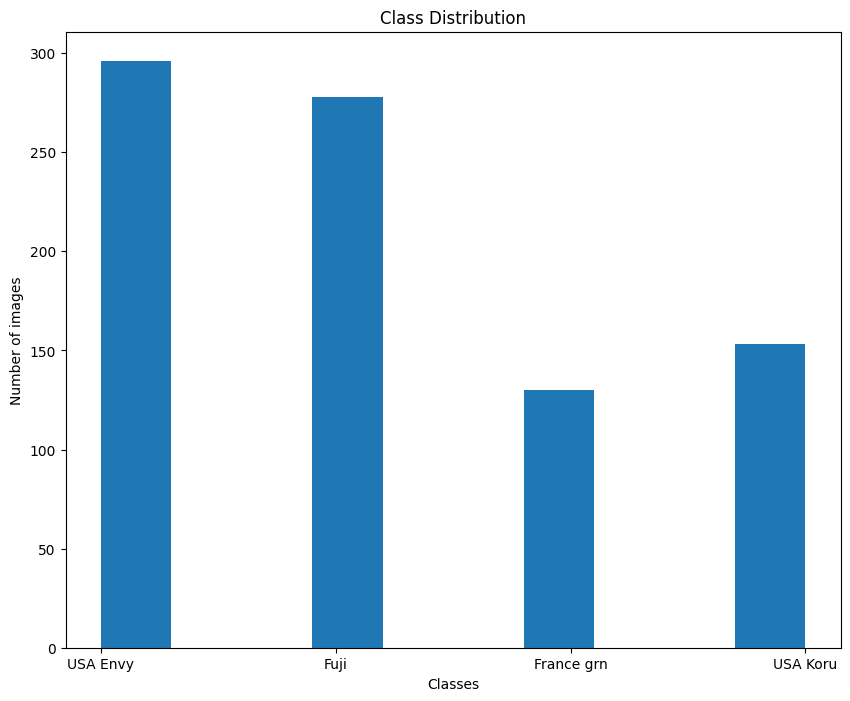

In [5]:
# Class Distribution
plt.figure(figsize=(10, 8))
plt.hist(labels)
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Number of images')
plt.show()

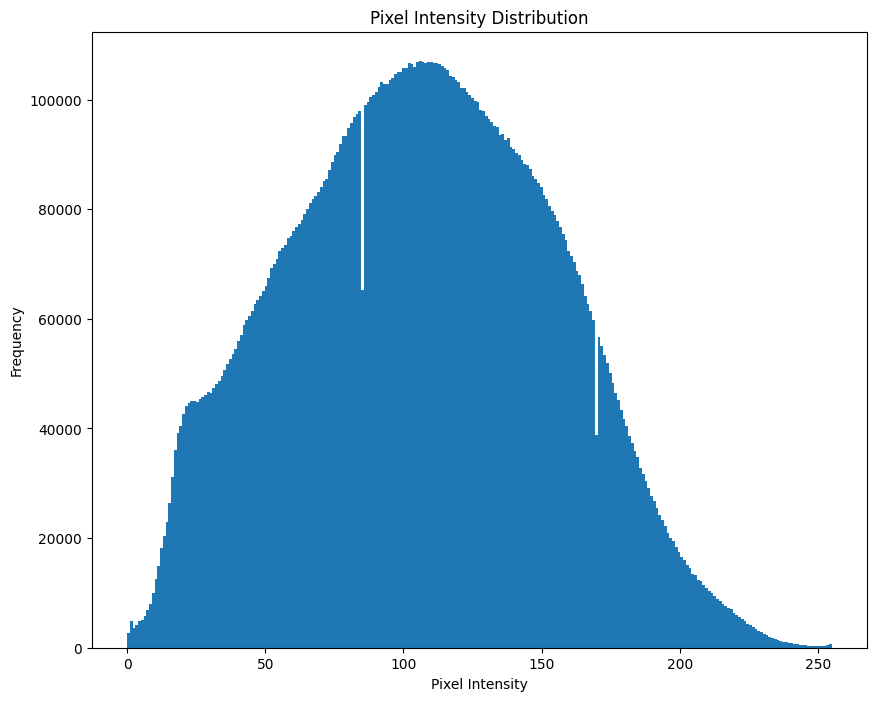

In [6]:
# Pixel Intensity Distribution
plt.figure(figsize=(10, 8))
plt.hist(intensities, bins=256)
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

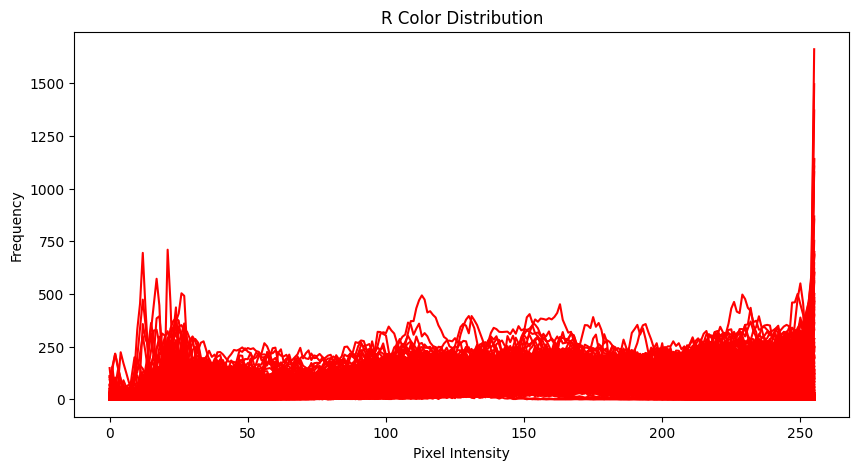

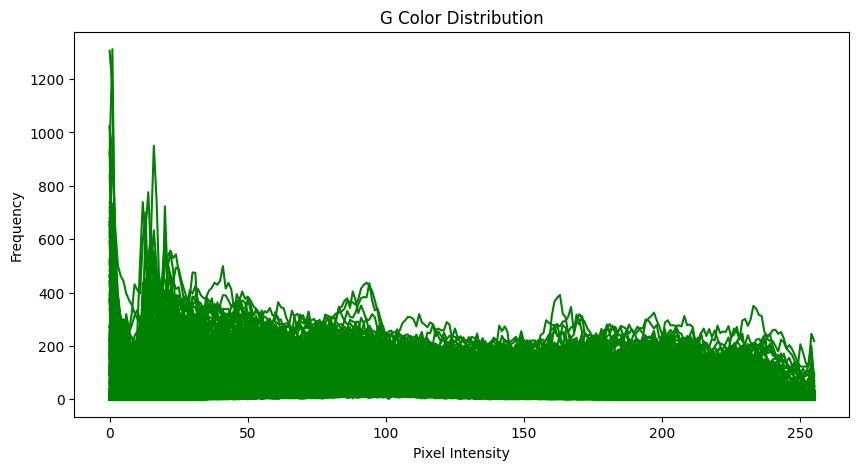

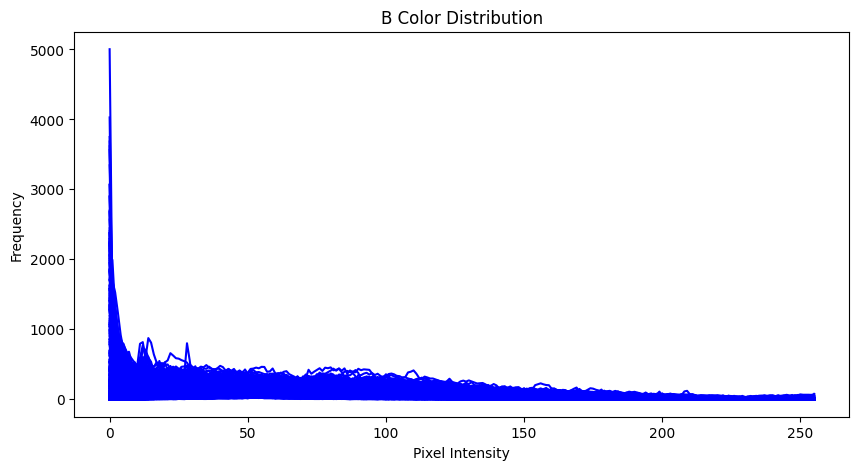

In [7]:
# Colour Distribution
colour = ('r', 'g', 'b')
for i, col in enumerate(colour):
    plt.figure(figsize=(10, 5))
    for img in images:
        hist = cv2.calcHist([img], [i], None, [256], [0, 256])
        plt.plot(hist, color=col)
    plt.title(f'{col.upper()} Color Distribution')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

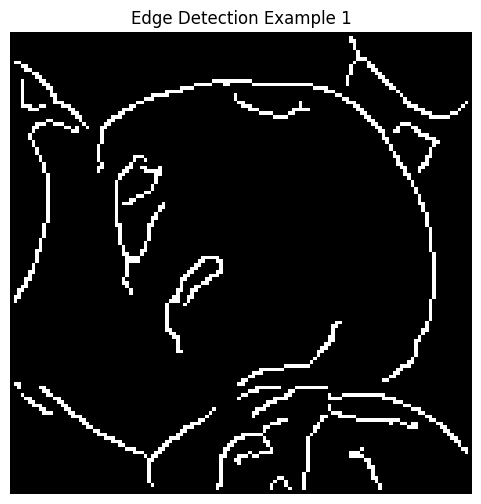

In [8]:
image = color.rgb2gray(images[0])
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
edges = feature.canny(blurred_image, high_threshold=0.3)

plt.figure(figsize=(6, 6))
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection Example 1')
plt.axis('off')
plt.show()

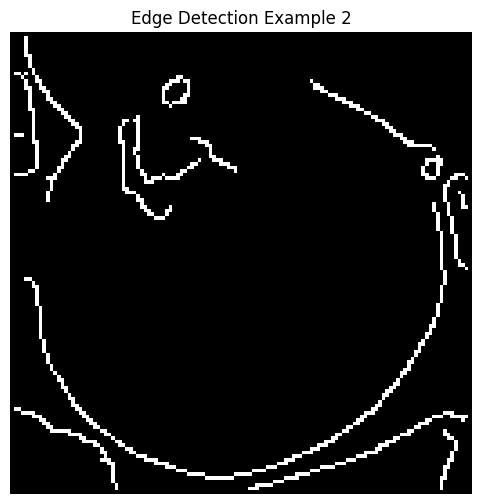

In [9]:
image = color.rgb2gray(images[3])
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
edges = feature.canny(blurred_image, high_threshold=0.4)

plt.figure(figsize=(6, 6))
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection Example 2')
plt.axis('off')
plt.show()